In [121]:
from functions import *
%matplotlib inline
import glob
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
def GP(alpha, beta, N):
    return N * (1/(4*alpha) + alpha) * (1 + beta/2)

def load_E_rho(filename):
    E = np.fromfile(filename + '__energy.bin', count=-1, dtype=np.float64)
    rho = np.fromfile(filename + '__density.bin', count=-1, dtype=np.float64)
    return E, rho

def load_set(pattern):
    files = sorted(glob.glob(pattern+'*__energy.bin'))
    files = [s.replace('__energy.bin', '') for s in files]
    return list(zip(*[load_E_rho(f) for f in files]))

def proper_error_plot_precomputed_per_particle(alphas, Es, num_particles, saveas=None):
    
    Es = Es / num_particles
    
    errors = [blocking(e) for e in Es]

    fig, ax = plt.subplots(figsize=figsize)
    ax.errorbar(alphas, np.mean(Es, axis=1), yerr=errors)
    ax.set_ylabel(r'$\langle H\rangle$', fontsize=axis_fontsize)
    ax.set_xlabel(r'$\alpha$', fontsize=axis_fontsize)
    ax.set_title(r'Ground state energy as function of variational parameter $\alpha$', fontsize=title_fontsize)

    if saveas:
        plt.savefig(saveas)
    
    return Es, errors

In [123]:
Es, rhos = load_set('../data/interacting-run1_0_3_100_32768*')
Es, rhos = np.asarray(Es), np.asarray(rhos)
np.mean(Es, axis=1)

array([ 268.0914649 ,  271.95151145,  269.34040577,  267.47647071,
        273.63009101])

(array([[ 2.6585901 ,  2.65825053,  2.6581541 , ...,  2.68842736,
          2.6901507 ,  2.6901507 ],
        [ 2.6210203 ,  2.61991452,  2.61962551, ...,  2.73034679,
          2.73297502,  2.73297502],
        [ 2.75373628,  2.75487625,  2.75533722, ...,  2.69963547,
          2.69973697,  2.69973697],
        [ 2.70324847,  2.70375368,  2.7040122 , ...,  2.67423251,
          2.67449554,  2.67449554],
        [ 2.81981001,  2.82172747,  2.82226427, ...,  2.72645491,
          2.72605593,  2.72605593]]),
 [0.003828062293694226,
  0.00827091527513773,
  0.003763608493154764,
  0.0011831907562668224,
  0.004904479995216373])

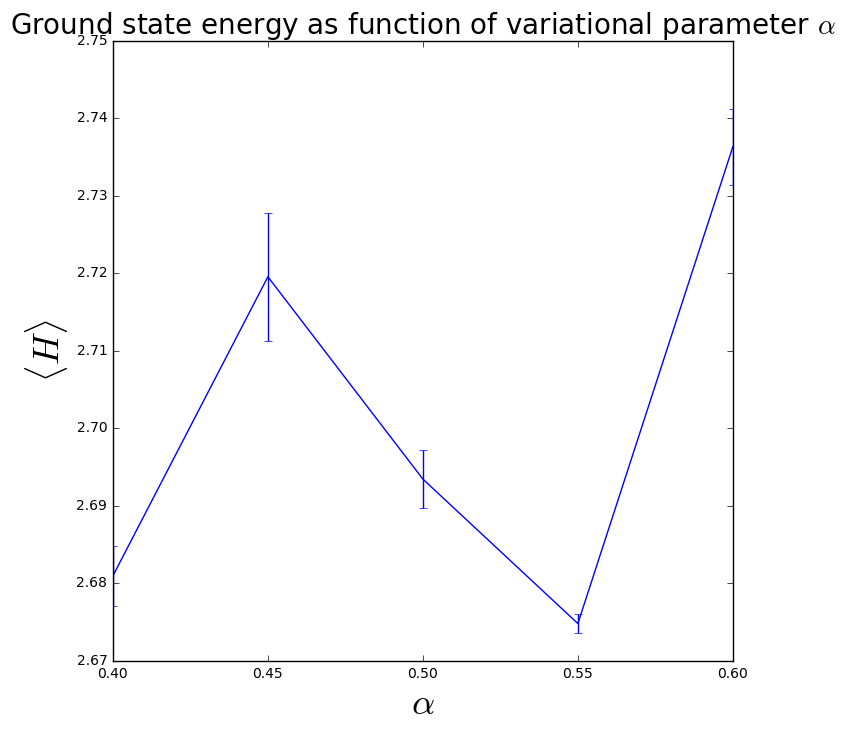

In [124]:
proper_error_plot_precomputed_per_particle([0.4, 0.45, 0.5, 0.55, 0.6], Es, 100)

\begin{tabular}{|c|c|c|}\hline
$\,$ & $N=10$ & $\,$ \\ \hline
$\alpha$ & VMC & GP\\ \hline
$0.40$ & $24.552 \pm 0.002865$ & $24.746$\\ \hline
$0.45$ & $24.994 \pm 0.006891$ & $24.276$\\ \hline
$0.50$ & $24.504 \pm 0.002704$ & $24.142$\\ \hline
$0.55$ & $24.400 \pm 0.000232$ & $24.252$\\ \hline
$0.60$ & $24.770 \pm 0.005075$ & $24.545$\\ \hline
\end{tabular}

\begin{tabular}{|c|c|c|}\hline
$\,$ & $N=50$ & $\,$ \\ \hline
$\alpha$ & VMC & GP\\ \hline
$0.40$ & $127.744 \pm 0.002530$ & $123.729$\\ \hline
$0.45$ & $130.019 \pm 0.006282$ & $121.381$\\ \hline
$0.50$ & $128.046 \pm 0.003077$ & $120.711$\\ \hline
$0.55$ & $127.234 \pm 0.000727$ & $121.259$\\ \hline
$0.60$ & $130.091 \pm 0.005271$ & $122.723$\\ \hline
\end{tabular}

\begin{tabular}{|c|c|c|}\hline
$\,$ & $N=100$ & $\,$ \\ \hline
$\alpha$ & VMC & GP\\ \hline
$0.40$ & $268.091 \pm 0.003828$ & $247.457$\\ \hline
$0.45$ & $271.952 \pm 0.008271$ & $242.763$\\ \hline
$0.50$ & $269.340 \pm 0.003764$ & $241.422$\\ \hline
$0.55$ & $267.476

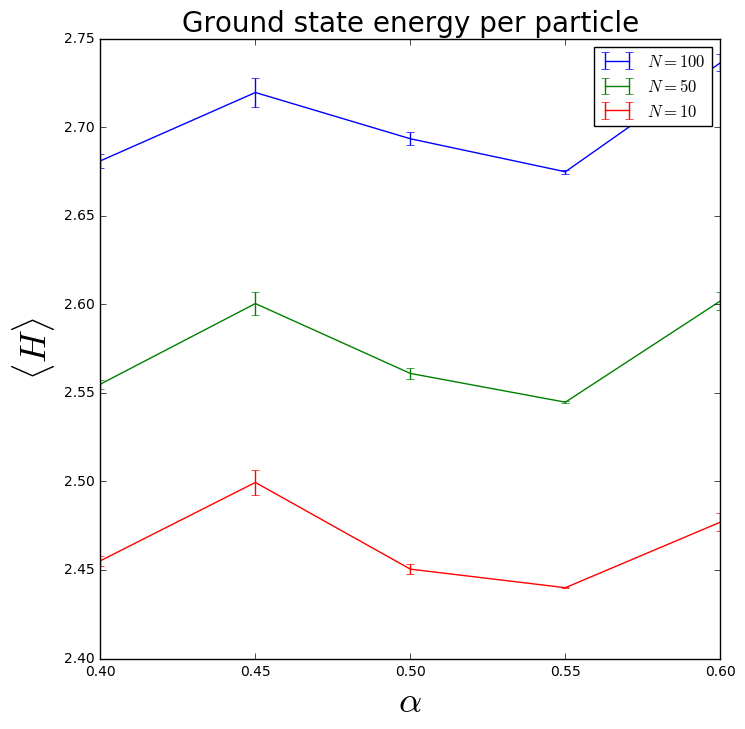

In [125]:
Es100, rhos100 = load_set('../data/interacting-run1_0_3_100_32768*')
Es100, rhos100 = np.asarray(Es100), np.asarray(rhos100)
Es100_errors = [blocking(e/100) for e in Es100]
Es50, rhos50 = load_set('../data/interacting-run1_0_3_50_131072*')
Es50, rhos50 = np.asarray(Es50), np.asarray(rhos50)
Es50_errors = [blocking(e/50) for e in Es50]
Es10, rhos10 = load_set('../data/interacting-run1_0_3_10_131072*')
Es10, rhos10 = np.asarray(Es10), np.asarray(rhos10)
Es10_errors = [blocking(e/10) for e in Es10]

fig, ax = plt.subplots(figsize=figsize)
ax.set_ylabel(r'$\langle H\rangle$', fontsize=axis_fontsize)
ax.set_xlabel(r'$\alpha$', fontsize=axis_fontsize)
ax.set_title(r'Ground state energy per particle', fontsize=title_fontsize)
alphas = [0.4, 0.45, 0.5, 0.55, 0.6]
ax.errorbar(alphas, np.mean(Es100, axis=1)/100, yerr=Es100_errors, label=r'$N=100$')
ax.errorbar(alphas, np.mean(Es50, axis=1)/50, yerr=Es50_errors, label=r'$N=50$')
ax.errorbar(alphas, np.mean(Es10, axis=1)/10, yerr=Es10_errors, label=r'$N=10$')
plt.legend(fontsize=12)
plt.savefig('../results/interacting-energy-per-particle.png')

for N in [10, 50, 100]:
    exec(r"""
print(r'''\begin{tabular}{|c|c|c|}\hline
$\,$ & $N=100$ & $\,$ \\ \hline
$\alpha$ & VMC & GP\\ \hline''')
for alpha, e, er in zip(alphas, np.mean(Es100,axis=1), Es100_errors):
    print(r'${:3.2f}$ & ${:5.3f} \pm {:5.6f}$ & ${:5.3f}$\\ \hline'.format(alpha, e, er, GP(alpha, 2.82843, 100)))
print(r'\end{tabular}')
""".replace('100', str(N)))
    print()

In [24]:
s.replace('__energy.bin', '')

'../data/interacting-run1_0_3_10_131072_0.5_2.82843_2.82843_0.0043_0.5_100_4'

In [136]:
(EN10,), rhosN10 = load_set('../data/N10-optimal-alpha-0.4978_N1048576*')
print(r'${:4.4f} \pm {:4.5f}$'.format(np.mean(EN10), blocking(EN10)))

$24.3984 \pm 0.00080$


In [137]:
density_plot_

NameError: name 'density_plot_' is not defined